In [16]:
import pandas as pd
import numpy as np  
from seaborn import pairplot

football_data = pd.read_csv("https://raw.githubusercontent.com/pattonsgirl/SU2021-CS2900/main/Class-Demos/spreadspoke_scores.csv")

football_data = football_data[football_data['schedule_season'] > 2009]
football_data.head(10)



,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10008,9/9/2010,2010,1,False,New Orleans Saints,14.0,9.0,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,False,72.0,0.0,NaN,DOME
10009,9/12/2010,2010,1,False,Buffalo Bills,10.0,15.0,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,False,64.0,7.0,81,NaN
10010,9/12/2010,2010,1,False,Chicago Bears,19.0,14.0,Detroit Lions,CHI,-6.5,45,Soldier Field,False,75.0,1.0,45,NaN
10011,9/12/2010,2010,1,False,Houston Texans,34.0,24.0,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof)
10012,9/12/2010,2010,1,False,Jacksonville Jaguars,24.0,17.0,Denver Broncos,JAX,-3.0,41.5,EverBank Field,False,91.0,1.0,67,NaN
10013,9/12/2010,2010,1,False,New England Patriots,38.0,24.0,Cincinnati Bengals,NE,-5.5,45,Gillette Stadium,False,63.0,10.0,NaN,NaN
10014,9/12/2010,2010,1,False,New York Giants,31.0,18.0,Carolina Panthers,NYG,-6.0,41,MetLife Stadium,False,65.0,1.0,67,Rain
10015,9/12/2010,2010,1,False,Philadelphia Eagles,20.0,27.0,Green Bay Packers,GB,-3.0,48,Lincoln Financial Field,False,69.0,4.0,72,NaN
10016,9/12/2010,2010,1,False,Pittsburgh Steelers,15.0,9.0,Atlanta Falcons,ATL,-1.5,39.5,Heinz Field,False,65.0,9.0,67,NaN
10017,9/12/2010,2010,1,False,Seattle Seahawks,31.0,6.0,San Francisco 49ers,SF,-3.0,37,CenturyLink Field,False,64.0,11.0,NaN,NaN


In [17]:

print(football_data.shape)
print(football_data.isna().sum())

football_data = football_data[football_data['score_home'].notna()]
print(football_data.shape)

print(football_data.isna().sum())

(3211, 17)
schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home              272
score_away              272
team_away                 0
team_favorite_id        272
spread_favorite         272
over_under_line         272
stadium                 272
stadium_neutral         272
weather_temperature     710
weather_wind_mph        712
weather_humidity       2539
weather_detail         2292
dtype: int64
(2939, 17)
schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     438
weather_wind_mph        440
weather_humidity       2267
weather_detail         2020
dtype: int64


In [18]:
football_data = football_data.dropna(thresh=0.75*len(football_data), axis = 1)
print(football_data.shape)
print(football_data.isna().sum())

(2939, 15)
schedule_date            0
schedule_season          0
schedule_week            0
schedule_playoff         0
team_home                0
score_home               0
score_away               0
team_away                0
team_favorite_id         0
spread_favorite          0
over_under_line          0
stadium                  0
stadium_neutral          0
weather_temperature    438
weather_wind_mph       440
dtype: int64


In [19]:
print(football_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 10008 to 12946
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        2939 non-null   object 
 1   schedule_season      2939 non-null   int64  
 2   schedule_week        2939 non-null   object 
 3   schedule_playoff     2939 non-null   bool   
 4   team_home            2939 non-null   object 
 5   score_home           2939 non-null   float64
 6   score_away           2939 non-null   float64
 7   team_away            2939 non-null   object 
 8   team_favorite_id     2939 non-null   object 
 9   spread_favorite      2939 non-null   float64
 10  over_under_line      2939 non-null   object 
 11  stadium              2939 non-null   object 
 12  stadium_neutral      2939 non-null   object 
 13  weather_temperature  2501 non-null   float64
 14  weather_wind_mph     2499 non-null   float64
dtypes: bool(1), float64(5), int64(1),

In [20]:
print(football_data.describe())

       schedule_season   score_home   score_away  spread_favorite  \
count      2939.000000  2939.000000  2939.000000      2939.000000   
mean       2015.003403    23.912215    21.844505        -5.290915   
std           3.164428    10.289965     9.921303         3.394564   
min        2010.000000     0.000000     0.000000       -26.500000   
25%        2012.000000    17.000000    15.000000        -7.000000   
50%        2015.000000    24.000000    21.000000        -4.000000   
75%        2018.000000    31.000000    28.000000        -3.000000   
max        2020.000000    62.000000    59.000000         0.000000   

       weather_temperature  weather_wind_mph  
count          2501.000000       2499.000000  
mean             62.834866          4.591437  
std              15.414497          4.630540  
min              -6.000000          0.000000  
25%              53.000000          0.000000  
50%              70.000000          4.000000  
75%              72.000000          7.000000  
ma

In [21]:
team = "New England Patriots"

pats_games = football_data[(football_data['team_home'] == team) | (football_data['team_away'] == team)]

pats_games.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph
10013,9/12/2010,2010,1,False,New England Patriots,38.0,24.0,Cincinnati Bengals,NE,-5.5,45,Gillette Stadium,False,63.0,10.0
10034,9/19/2010,2010,2,False,New York Jets,28.0,14.0,New England Patriots,NE,-3.0,39.5,MetLife Stadium,False,82.0,6.0
10049,9/26/2010,2010,3,False,New England Patriots,38.0,30.0,Buffalo Bills,NE,-14.5,43,Gillette Stadium,False,68.0,11.0
10069,10/4/2010,2010,4,False,Miami Dolphins,14.0,41.0,New England Patriots,NE,-1.0,48,Sun Life Stadium,False,81.0,1.0
10089,10/17/2010,2010,6,False,New England Patriots,23.0,20.0,Baltimore Ravens,NE,-3.0,44.5,Gillette Stadium,False,57.0,14.0
10107,10/24/2010,2010,7,False,San Diego Chargers,20.0,23.0,New England Patriots,LAC,-1.5,49.5,Qualcomm Stadium,False,69.0,7.0
10117,10/31/2010,2010,8,False,New England Patriots,28.0,18.0,Minnesota Vikings,NE,-5.5,45,Gillette Stadium,False,52.0,16.0
10129,11/7/2010,2010,9,False,Cleveland Browns,34.0,14.0,New England Patriots,NE,-4.0,43.5,FirstEnergy Stadium,False,44.0,13.0
10148,11/14/2010,2010,10,False,Pittsburgh Steelers,26.0,39.0,New England Patriots,PIT,-4.5,45,Heinz Field,False,50.0,8.0
10159,11/21/2010,2010,11,False,New England Patriots,31.0,28.0,Indianapolis Colts,NE,-4.5,50,Gillette Stadium,False,37.0,6.0


In [22]:
pats_games['home_or_away'] = np.where(pats_games['team_home'] == team, 1, 0)
pats_games.head(10)

<ipython-input-22-219ebebad2e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pats_games['home_or_away'] = np.where(pats_games['team_home'] == team, 1, 0)


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,home_or_away
10013,9/12/2010,2010,1,False,New England Patriots,38.0,24.0,Cincinnati Bengals,NE,-5.5,45,Gillette Stadium,False,63.0,10.0,1
10034,9/19/2010,2010,2,False,New York Jets,28.0,14.0,New England Patriots,NE,-3.0,39.5,MetLife Stadium,False,82.0,6.0,0
10049,9/26/2010,2010,3,False,New England Patriots,38.0,30.0,Buffalo Bills,NE,-14.5,43,Gillette Stadium,False,68.0,11.0,1
10069,10/4/2010,2010,4,False,Miami Dolphins,14.0,41.0,New England Patriots,NE,-1.0,48,Sun Life Stadium,False,81.0,1.0,0
10089,10/17/2010,2010,6,False,New England Patriots,23.0,20.0,Baltimore Ravens,NE,-3.0,44.5,Gillette Stadium,False,57.0,14.0,1
10107,10/24/2010,2010,7,False,San Diego Chargers,20.0,23.0,New England Patriots,LAC,-1.5,49.5,Qualcomm Stadium,False,69.0,7.0,0
10117,10/31/2010,2010,8,False,New England Patriots,28.0,18.0,Minnesota Vikings,NE,-5.5,45,Gillette Stadium,False,52.0,16.0,1
10129,11/7/2010,2010,9,False,Cleveland Browns,34.0,14.0,New England Patriots,NE,-4.0,43.5,FirstEnergy Stadium,False,44.0,13.0,0
10148,11/14/2010,2010,10,False,Pittsburgh Steelers,26.0,39.0,New England Patriots,PIT,-4.5,45,Heinz Field,False,50.0,8.0,0
10159,11/21/2010,2010,11,False,New England Patriots,31.0,28.0,Indianapolis Colts,NE,-4.5,50,Gillette Stadium,False,37.0,6.0,1


In [23]:
pats_games = pats_games.filter(['team_home', 'team_away', 'score_home', 'score_away', 'weather_temperature', 'weather_wind_mph', 'home_or_away'])
pats_games.head(10)

,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away
10013,New England Patriots,Cincinnati Bengals,38.0,24.0,63.0,10.0,1
10034,New York Jets,New England Patriots,28.0,14.0,82.0,6.0,0
10049,New England Patriots,Buffalo Bills,38.0,30.0,68.0,11.0,1
10069,Miami Dolphins,New England Patriots,14.0,41.0,81.0,1.0,0
10089,New England Patriots,Baltimore Ravens,23.0,20.0,57.0,14.0,1
10107,San Diego Chargers,New England Patriots,20.0,23.0,69.0,7.0,0
10117,New England Patriots,Minnesota Vikings,28.0,18.0,52.0,16.0,1
10129,Cleveland Browns,New England Patriots,34.0,14.0,44.0,13.0,0
10148,Pittsburgh Steelers,New England Patriots,26.0,39.0,50.0,8.0,0
10159,New England Patriots,Indianapolis Colts,31.0,28.0,37.0,6.0,1


In [24]:
pats_games['score'] = np.where(pats_games['team_home'] == team, pats_games['score_home'], pats_games['score_away'])
pats_games.head(10)

,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,score
10013,New England Patriots,Cincinnati Bengals,38.0,24.0,63.0,10.0,1,38.0
10034,New York Jets,New England Patriots,28.0,14.0,82.0,6.0,0,14.0
10049,New England Patriots,Buffalo Bills,38.0,30.0,68.0,11.0,1,38.0
10069,Miami Dolphins,New England Patriots,14.0,41.0,81.0,1.0,0,41.0
10089,New England Patriots,Baltimore Ravens,23.0,20.0,57.0,14.0,1,23.0
10107,San Diego Chargers,New England Patriots,20.0,23.0,69.0,7.0,0,23.0
10117,New England Patriots,Minnesota Vikings,28.0,18.0,52.0,16.0,1,28.0
10129,Cleveland Browns,New England Patriots,34.0,14.0,44.0,13.0,0,14.0
10148,Pittsburgh Steelers,New England Patriots,26.0,39.0,50.0,8.0,0,39.0
10159,New England Patriots,Indianapolis Colts,31.0,28.0,37.0,6.0,1,31.0


In [25]:
pats_games['2_game_avg'] = pats_games['score'].shift(periods=1).rolling(window=2).mean()
pats_games['5_game_avg'] = pats_games['score'].shift(periods=1).rolling(window=5).mean()

#pats_games['2_game_avg'].fillna(pats_games['2_game_avg'].mean())
pats_games = pats_games.fillna(pats_games.mean())
print(pats_games.mean())

pats_games.head(10)

score_home             25.391960
score_away             22.959799
weather_temperature    55.447205
weather_wind_mph        6.378882
home_or_away            0.537688
score                  28.733668
2_game_avg             28.763959
5_game_avg             28.882474
dtype: float64


,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,score,2_game_avg,5_game_avg
10013,New England Patriots,Cincinnati Bengals,38.0,24.0,63.0,10.0,1,38.0,28.763959,28.882474
10034,New York Jets,New England Patriots,28.0,14.0,82.0,6.0,0,14.0,28.763959,28.882474
10049,New England Patriots,Buffalo Bills,38.0,30.0,68.0,11.0,1,38.0,26.000000,28.882474
10069,Miami Dolphins,New England Patriots,14.0,41.0,81.0,1.0,0,41.0,26.000000,28.882474
10089,New England Patriots,Baltimore Ravens,23.0,20.0,57.0,14.0,1,23.0,39.500000,28.882474
10107,San Diego Chargers,New England Patriots,20.0,23.0,69.0,7.0,0,23.0,32.000000,30.800000
10117,New England Patriots,Minnesota Vikings,28.0,18.0,52.0,16.0,1,28.0,23.000000,27.800000
10129,Cleveland Browns,New England Patriots,34.0,14.0,44.0,13.0,0,14.0,25.500000,30.600000
10148,Pittsburgh Steelers,New England Patriots,26.0,39.0,50.0,8.0,0,39.0,21.000000,25.800000
10159,New England Patriots,Indianapolis Colts,31.0,28.0,37.0,6.0,1,31.0,26.500000,25.400000


In [26]:
pats_games['winner'] = np.where(pats_games['score_home'] > pats_games['score_away'], pats_games['team_home'], pats_games['team_away'])
pats_games['team_win'] = np.where(pats_games['winner'] == team, 1, 0)

pats_games.head(10)

,team_home,team_away,score_home,score_away,weather_temperature,weather_wind_mph,home_or_away,score,2_game_avg,5_game_avg,winner,team_win
10013,New England Patriots,Cincinnati Bengals,38.0,24.0,63.0,10.0,1,38.0,28.763959,28.882474,New England Patriots,1
10034,New York Jets,New England Patriots,28.0,14.0,82.0,6.0,0,14.0,28.763959,28.882474,New York Jets,0
10049,New England Patriots,Buffalo Bills,38.0,30.0,68.0,11.0,1,38.0,26.000000,28.882474,New England Patriots,1
10069,Miami Dolphins,New England Patriots,14.0,41.0,81.0,1.0,0,41.0,26.000000,28.882474,New England Patriots,1
10089,New England Patriots,Baltimore Ravens,23.0,20.0,57.0,14.0,1,23.0,39.500000,28.882474,New England Patriots,1
10107,San Diego Chargers,New England Patriots,20.0,23.0,69.0,7.0,0,23.0,32.000000,30.800000,New England Patriots,1
10117,New England Patriots,Minnesota Vikings,28.0,18.0,52.0,16.0,1,28.0,23.000000,27.800000,New England Patriots,1
10129,Cleveland Browns,New England Patriots,34.0,14.0,44.0,13.0,0,14.0,25.500000,30.600000,Cleveland Browns,0
10148,Pittsburgh Steelers,New England Patriots,26.0,39.0,50.0,8.0,0,39.0,21.000000,25.800000,New England Patriots,1
10159,New England Patriots,Indianapolis Colts,31.0,28.0,37.0,6.0,1,31.0,26.500000,25.400000,New England Patriots,1


In [27]:
print(pats_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 10013 to 12929
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team_home            199 non-null    object 
 1   team_away            199 non-null    object 
 2   score_home           199 non-null    float64
 3   score_away           199 non-null    float64
 4   weather_temperature  199 non-null    float64
 5   weather_wind_mph     199 non-null    float64
 6   home_or_away         199 non-null    int32  
 7   score                199 non-null    float64
 8   2_game_avg           199 non-null    float64
 9   5_game_avg           199 non-null    float64
 10  winner               199 non-null    object 
 11  team_win             199 non-null    int32  
dtypes: float64(7), int32(2), object(3)
memory usage: 18.7+ KB
None


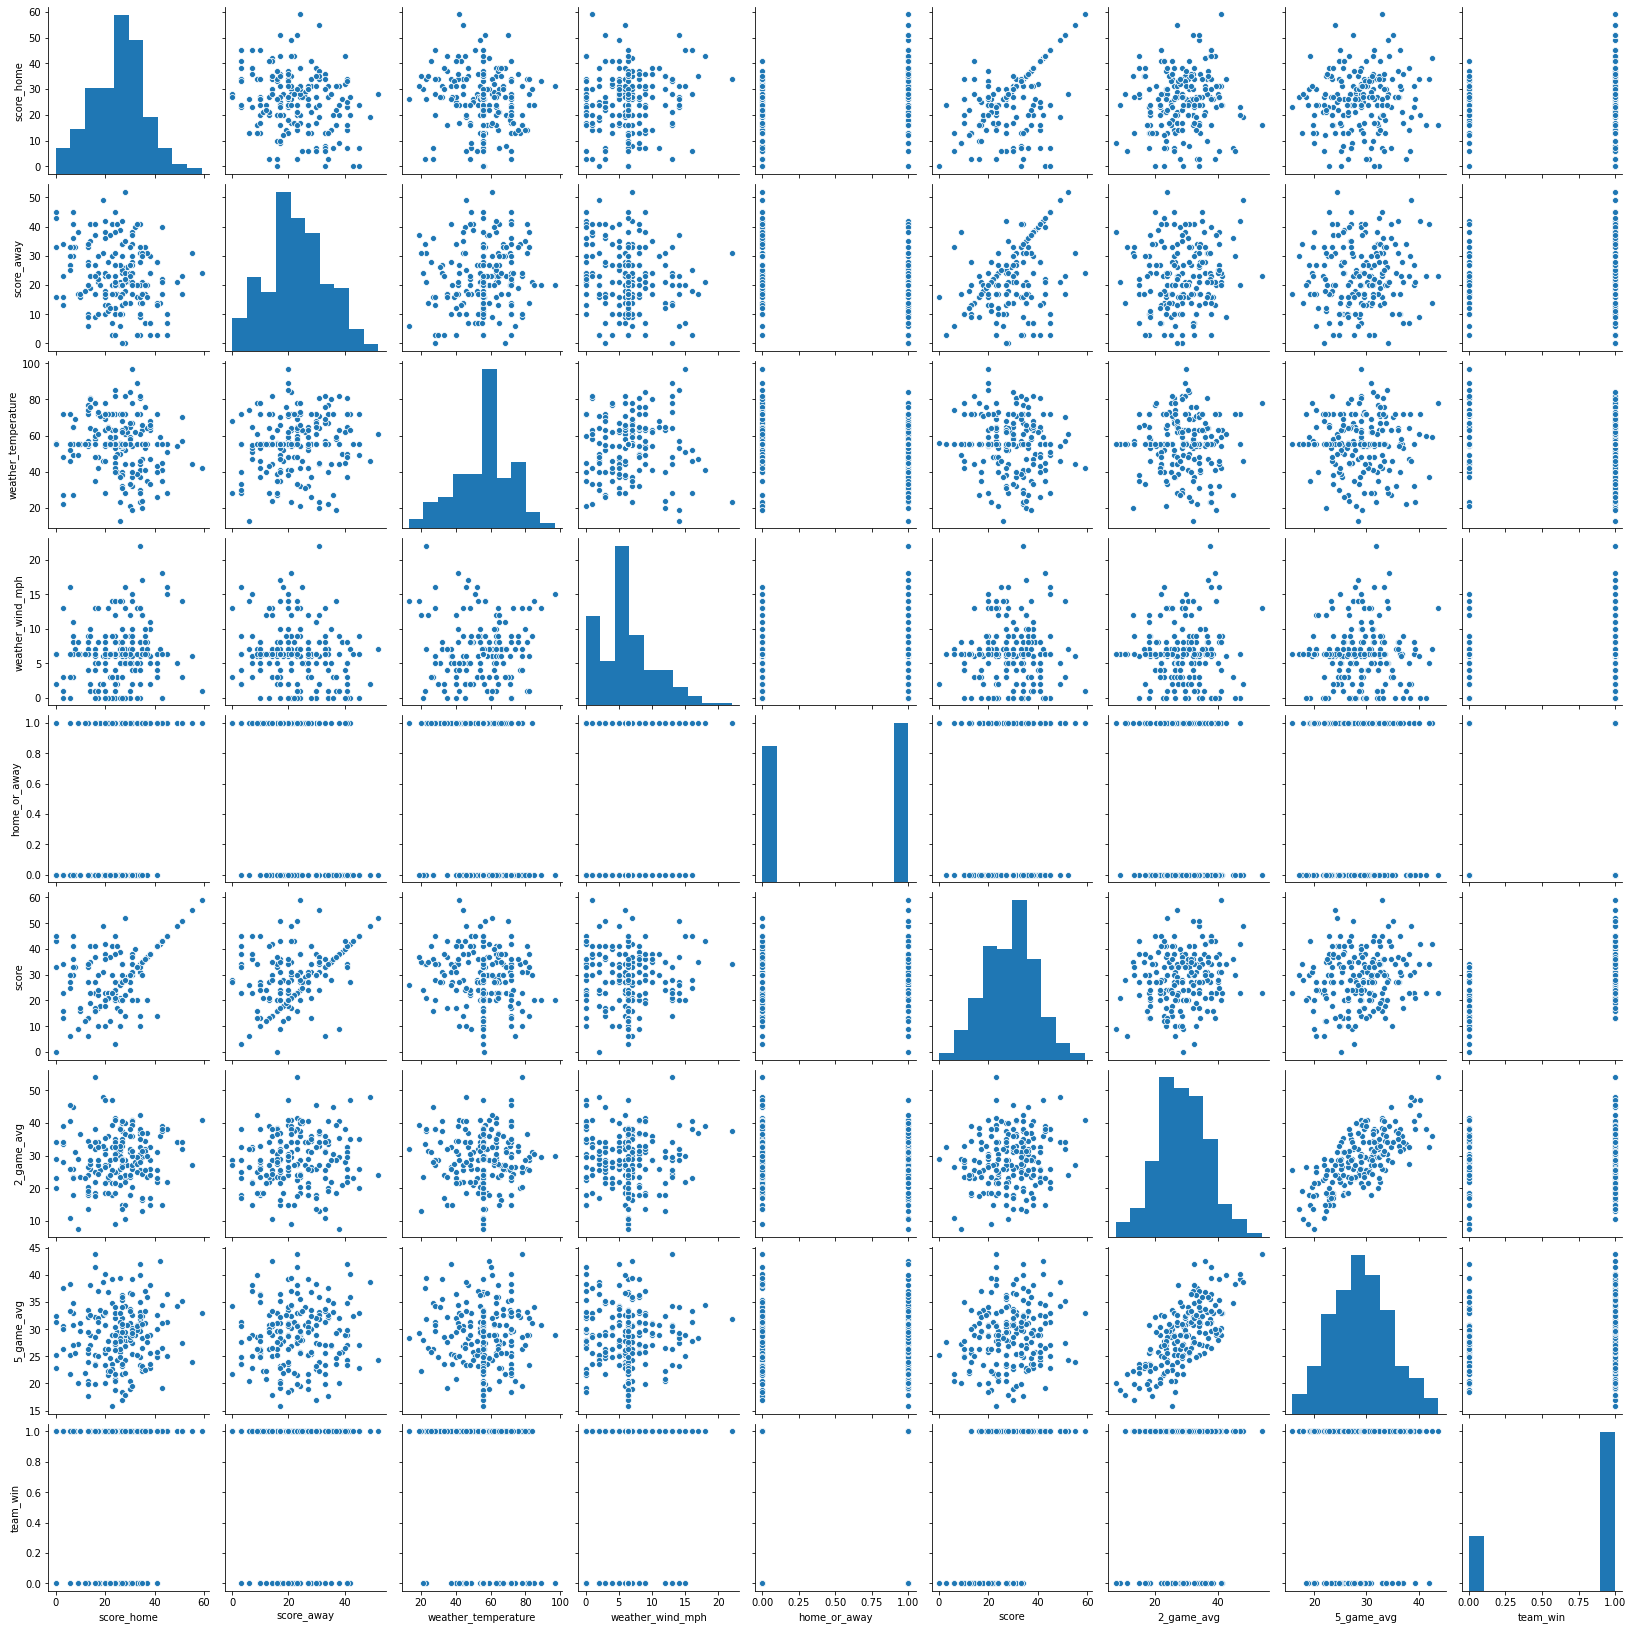

In [28]:
pairplot(pats_games)

In [29]:
print(pats_games.corr())

                     score_home  score_away  weather_temperature  \
score_home             1.000000   -0.224485            -0.141362   
score_away            -0.224485    1.000000             0.130841   
weather_temperature   -0.141362    0.130841             1.000000   
weather_wind_mph       0.120758   -0.175789            -0.094251   
home_or_away           0.447999   -0.370505            -0.249574   
score                  0.482321    0.412942            -0.136440   
2_game_avg             0.097100    0.095925            -0.032907   
5_game_avg             0.061851    0.077460            -0.021907   
team_win               0.061872    0.052742            -0.162871   

                     weather_wind_mph  home_or_away     score  2_game_avg  \
score_home                   0.120758      0.447999  0.482321    0.097100   
score_away                  -0.175789     -0.370505  0.412942    0.095925   
weather_temperature         -0.094251     -0.249574 -0.136440   -0.032907   
weather_win